In [73]:
import importlib
import data_processing as dp

In [226]:
importlib.reload(dp)

# download the s3 data
dp.download_s3_data()

# Combine tables from files
games_df, odds_df = dp.combine_data()


Downloaded 184 files to: downloaded_files
Combined games shape: (26, 5)
Combined odds shape: (1009, 6)


### Plot odds

Away max odds: 2.10
Home max odds: 2.18
Bet on away: $101.87
Bet on home: $98.13
Profit: $13.93
Percentage profit: 6.96%


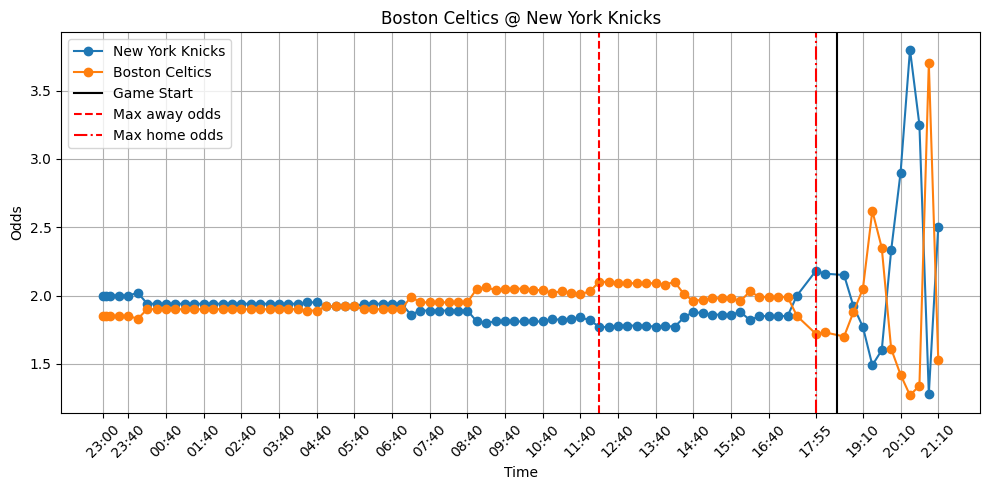

In [253]:
# Look at odds for game referenced by game_id
importlib.reload(dp)

# select games
game_id = odds_df.iloc[4]['GameID'] 

# fix up the datetime of that match
game_info, game_odds, start_time = dp.fix_datetime(game_id, games_df, odds_df)

# crunch numbers
total_bet = 200
result = dp.find_middle_strategy(game_info, game_odds, start_time, total_bet)
print(f"Away max odds: {result['away_max_odds']:.2f}")
print(f"Home max odds: {result['home_max_odds']:.2f}")
print(f"Bet on away: ${result['b1']:.2f}")
print(f"Bet on home: ${result['b2']:.2f}")
print(f"Profit: ${result['profit']:.2f}")
print(f'Percentage profit: {result['profit']/total_bet*100:.2f}%')

# show odds over time
dp.plot_odds_data(game_info, game_odds, start_time, result['away_time'], result['home_time'])